# Analysis of the population and dwelling occupancy/vacancy rates in Donegal


In [1]:
# Importing pyaxis in order to read .px file type
from pyaxis import pyaxis
import pandas as pd
import numpy as np

# URL for dataset containing information on the population and dwelling occupancy/vacancy rates in dongeal, from CSO.ie
donegalDataURL = 'https://www.cso.ie/px/pxeirestat/Database/eirestat/Profile%201%20-%20Geography/CD154.px'

# Parsing the file - This will give the ["METADATA"] and ["DATA"] subsets
px = pyaxis.parse(donegalDataURL, encoding='ISO-8859-2')

# Creating a Pandas DataFrame from the ["DATA"]
df = pd.DataFrame.from_dict(px["DATA"])

# Finding the number of rows and colums so that max_rows can be set
rows, columns = df.shape

# Setting max rows
pd.set_option('display.max_rows', rows)

In [2]:
df.head(10)

,Townlands,CensusYear,Statistic,DATA
0,"Abbernadoorny, Donegal, Co. Donegal",2011,Population (Number),NaN
1,"Abbernadoorny, Donegal, Co. Donegal",2011,Males (Number),NaN
2,"Abbernadoorny, Donegal, Co. Donegal",2011,Females (Number),NaN
3,"Abbernadoorny, Donegal, Co. Donegal",2011,Private households occupied (Number),NaN
4,"Abbernadoorny, Donegal, Co. Donegal",2011,Private households unoccupied (Number),NaN
5,"Abbernadoorny, Donegal, Co. Donegal",2011,Vacant dwellings (Number),NaN
6,"Abbernadoorny, Donegal, Co. Donegal",2011,Housing stock (Number),NaN
7,"Abbernadoorny, Donegal, Co. Donegal",2011,Vacancy rate (%),NaN
8,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Population (Number),12.0
9,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Males (Number),8.0


In [3]:
df = df.dropna()

In [4]:
df.head(10)

,Townlands,CensusYear,Statistic,DATA
8,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Population (Number),12.0
9,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Males (Number),8.0
10,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Females (Number),4.0
11,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Private households occupied (Number),5.0
12,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Private households unoccupied (Number),1.0
13,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Vacant dwellings (Number),1.0
14,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Housing stock (Number),6.0
15,"Abbey Island, Ballyshannon Rural, Co. Donegal",2011,Vacancy rate (%),16.7
16,"Abbeylands, Ballyshannon Rural, Co. Donegal",2011,Population (Number),135.0
17,"Abbeylands, Ballyshannon Rural, Co. Donegal",2011,Males (Number),70.0


In [5]:
df.dtypes

Townlands     object
CensusYear    object
Statistic     object
DATA          object
dtype: object

In [6]:
df["DATA"] = df["DATA"].astype(float)

df.dtypes

Townlands      object
CensusYear     object
Statistic      object
DATA          float64
dtype: object

In [7]:
df = df.pivot(index="Townlands", columns="Statistic", values="DATA")

df.head(10)

Statistic,Females (Number),Housing stock (Number),Males (Number),Population (Number),Private households occupied (Number),Private households unoccupied (Number),Vacancy rate (%),Vacant dwellings (Number)
Townlands,,,,,,,,
"Abbey Island, Ballyshannon Rural, Co. Donegal",4.0,6.0,8.0,12.0,5.0,1.0,16.7,1.0
"Abbeylands, Ballyshannon Rural, Co. Donegal",65.0,79.0,70.0,135.0,54.0,25.0,27.8,22.0
"Adderville, Straid, Co. Donegal",25.0,21.0,28.0,53.0,16.0,5.0,23.8,5.0
"Adderwal, Glenleheen, Co. Donegal",4.0,7.0,4.0,8.0,4.0,3.0,42.9,3.0
"Admiran, Stranorlar, Co. Donegal",175.0,139.0,167.0,342.0,116.0,23.0,12.2,17.0
"Aghadachor, Glen, Co. Donegal",6.0,38.0,6.0,12.0,6.0,32.0,84.2,32.0
"Aghadowey, Ballintra, Co. Donegal",10.0,7.0,11.0,21.0,7.0,0.0,0.0,0.0
"Aghadreenan, Rosnakill, Co. Donegal",20.0,24.0,26.0,46.0,14.0,10.0,41.7,10.0
"Aghafoy, Pettigoe, Co. Donegal",3.0,5.0,4.0,7.0,3.0,2.0,40.0,2.0


## Visualising the Data

In [2]:
# Adapted from https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

# Importing Geopandas
import geopandas as gpd

In [5]:
# Loading the shapefile
map_df = gpd.read_file("DATA/townlands.shp")

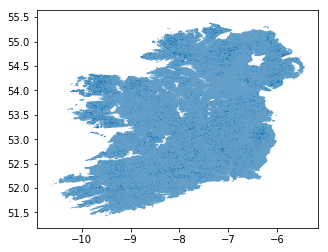

In [6]:
# Plotting the empty map
map_df.plot()